# ***Problem statement***

**This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.**

In [0]:
# Compare Algorithms
!pip install -q scikit-plot
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import scikitplot as skplt
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve,roc_auc_score

## ***Loading Dataset***




In [3]:
# load dataset
dataframe = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
dataframe_orig=dataframe
dataframe.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# ***Perform Exploratory Data Analysis***
Shape of the data

columns in the dataframe

Data types in the data frame

checking for missing values

Checking for outliers in each attribute

Performing Univariate and Bivariate (attribute vs Personal loan attribute) analysis 

Performing univariate analysis of the 'Personal Loan' Column which is the target variable

checking if the classes are balanced


In [4]:
dataframe.shape

(5000, 14)

**Attribute Information:**
 ID : Customer ID

 Age : Customer's age in completed years

 Experience : #years of professional experience

 Income : Annual income of the customer ( in 000)

 ZIP Code : Home Address ZIP code.

 Family : Family size of the customer

 CCAvg : Avg. spending on credit cards per month (in 000)

 Education : Education Level. 1: Undergrad; 2: Graduate;3: AdvancedProfessional

 Mortgage : Value of house mortgage if any. ( in 000)

 Personal Loan : Did this customer accept the personal loan offered in the last campaign?

 Securities Account : Does the customer have a securities account with the bank?

 CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

 Online : Does the customer use internet banking facilities?

 Credit card : Does the customer use a credit card issued by UniversalBank? 


In [5]:
dataframe.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
# Checking for the datatypes of the attributes
dataframe.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
#Checking the presence of missing values
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dataframe)
# no missing values

,Total,Percent
CreditCard,0,0.0
Online,0,0.0
CD Account,0,0.0
Securities Account,0,0.0
Personal Loan,0,0.0
Mortgage,0,0.0
Education,0,0.0
CCAvg,0,0.0
Family,0,0.0
ZIP Code,0,0.0


In [8]:
# Five point summary of numerical attributes
#the five-point summary consists of the following:
#The minimum – this is the smallest value in our data set.
#The first quartile – this number is denoted Q1 and 25% of our data falls below the first quartile.
#The median – this is the midway point of the data. 50% of all data falls below the median.
#The third quartile – this number is denoted Q3 and 75% of our data falls below the third quartile.
#The maximum – this is the largest value in our data set.
dataframe.describe() #descriptive stats of numeric columns

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


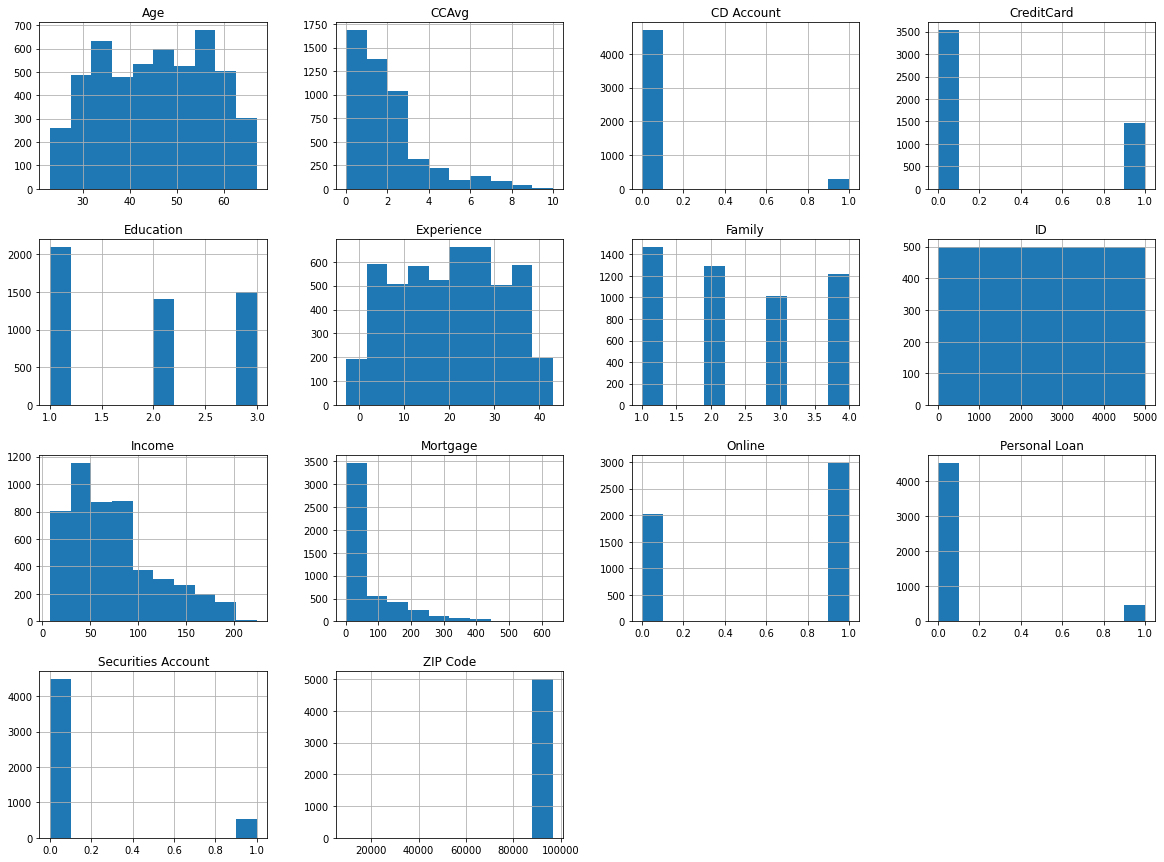

In [9]:
#Univariate Analysis
import matplotlib.pyplot as plt
%matplotlib inline
dataframe.hist(bins=10, figsize=(20,15))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


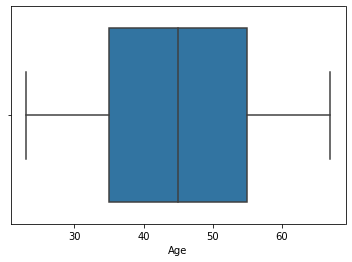

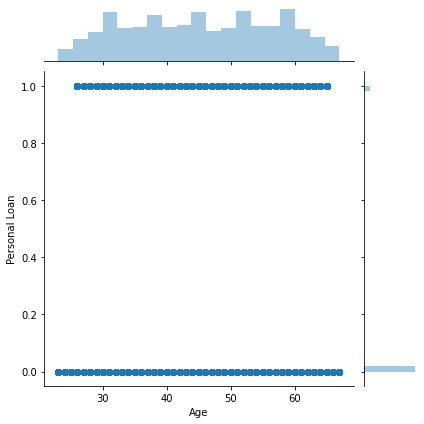

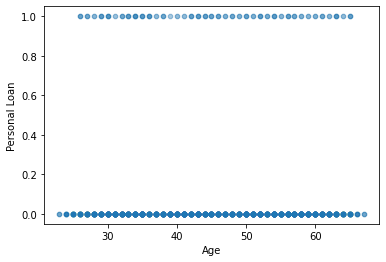

In [10]:
#ignoring ID column as it does not provide any useful information and will be dropped
import seaborn as sns
sns.boxplot(x=dataframe['Age']) 
# no Outliers
#mean 45
# Inter quartile range 35 to 55
sns.jointplot(x='Age', y='Personal Loan', data=dataframe)
df=dataframe[dataframe['Personal Loan']==1]
dataframe.plot(kind="scatter",x='Age', y='Personal Loan',alpha=0.08)

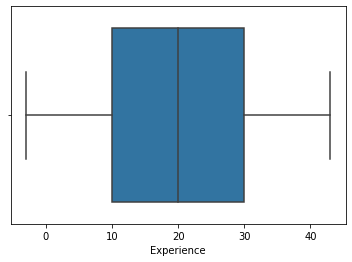

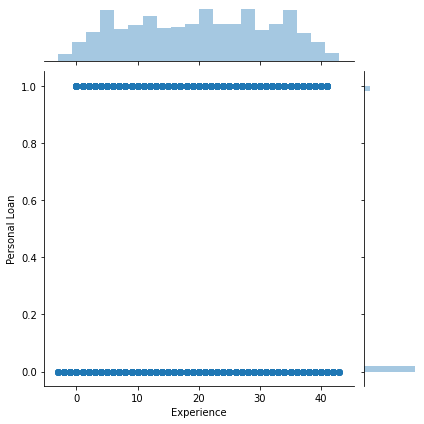

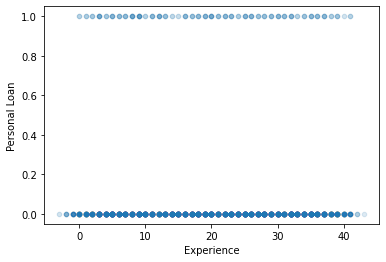

In [11]:
sns.boxplot(x=dataframe['Experience']) 
# no Outliers however Experience cannot be negative so those need to be fixed
#mean 20
# Inter quartile range 10 to 30
sns.jointplot(x='Experience', y='Personal Loan', data=dataframe)
dataframe.plot(kind="scatter",x='Experience', y='Personal Loan',alpha=0.05)
# Personal Loans not taken only by a specific age group.. it seems to be spread across the age of the customers

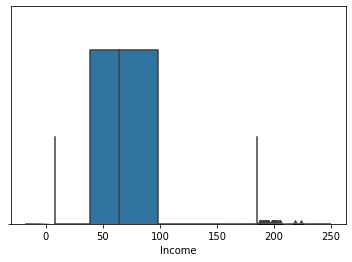

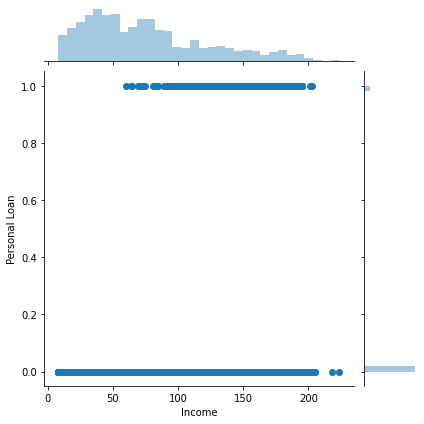

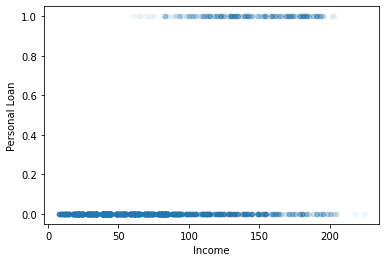

In [12]:
sns.boxplot(x=dataframe['Income']) 
# Outliersto the right of Q3
#mean 73...
# Inter quartile range 45 to 95 

sns.distplot(dataframe['Income']) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.v

sns.jointplot(x='Income', y='Personal Loan', data=dataframe)
# Only people beyong 50K take personal Loans
# Income is skewed with a large right tail

dataframe.plot(kind="scatter",x='Income', y='Personal Loan',alpha=0.05)
#majority of theloans are taken by people from 100k to 200K


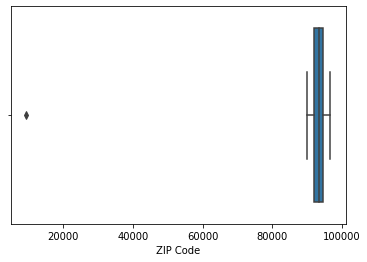

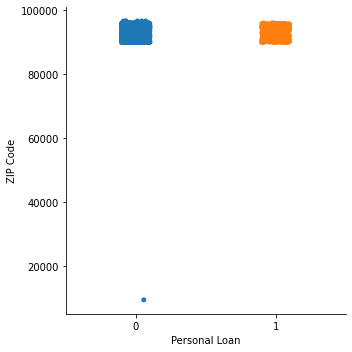

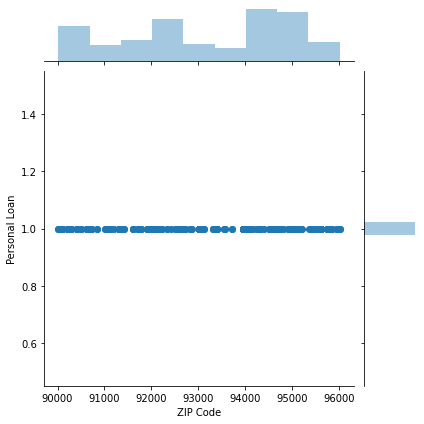

In [13]:
sns.boxplot(x=dataframe['ZIP Code']) 
# one outlier to the left .. this seems like a data entry issue
#mean not relevant this case as this data is not numerical
# Inter quartile range not relevant this case as this data is not numerical
sns.catplot(x="Personal Loan", y="ZIP Code", data=dataframe)
dataframe['ZIP Code'].value_counts()

dataframe.groupby(['ZIP Code'])['Personal Loan'].sum() 


dataframe.pivot_table(index='Personal Loan', columns='ZIP Code', aggfunc={'ZIP Code':len}, fill_value=0)

sns.jointplot(x='ZIP Code', y='Personal Loan', data=dataframe[dataframe['Personal Loan']==1])
# people from a few zip codes are morelikely to take personal loan






Family                 
Family             1     2    3     4
Personal Loan                        
0               1365  1190  877  1088
1                107   106  133   134

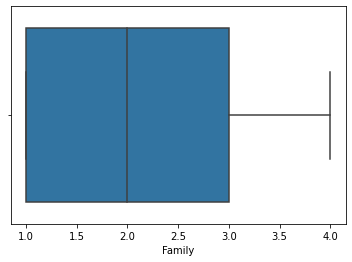

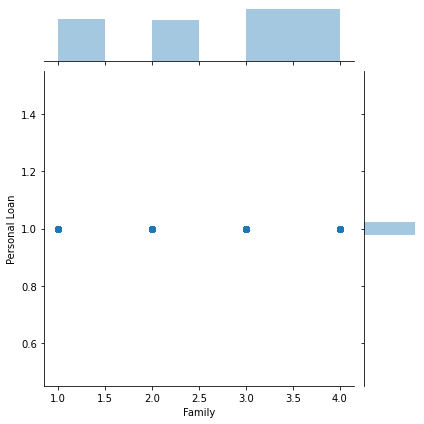

In [14]:
sns.boxplot(x=dataframe['Family']) 
# No outliers
#mean 2
# Inter quartile range 1 to 3
# 13.5% of the families with 3 or 4 kids took personal loans as compared to only 8.33% families with 1 or 2 kids

sns.jointplot(x='Family', y='Personal Loan', data=dataframe[dataframe['Personal Loan']==1])
dataframe.pivot_table(index='Personal Loan', columns='Family', aggfunc={'Family':len}, fill_value=0)


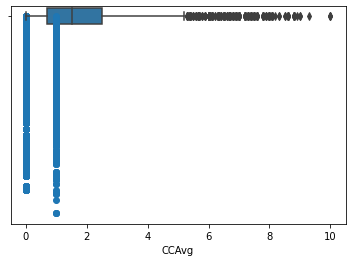

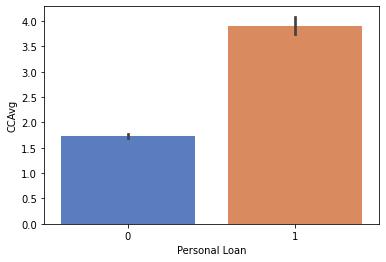

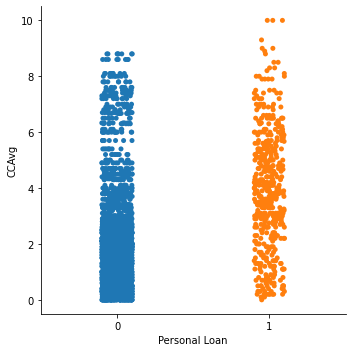

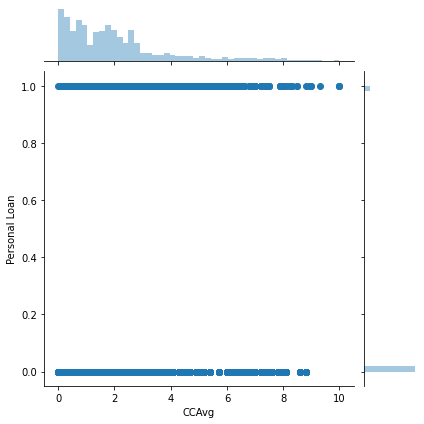

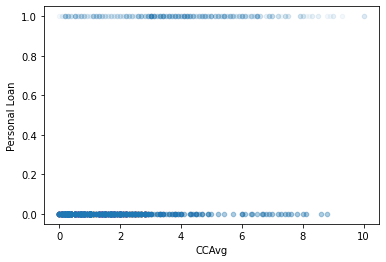

In [15]:
sns.boxplot(x=dataframe['CCAvg']) 
#CCAvg :average spending on credit cards per month
# Outliers to the right of Q3
#mean 1.9
# Inter quartile range 0.7 to 2.5
#CCAvg is skewed with a large right tail

dataframe.loc[(dataframe['CCAvg'] <1.9) & (dataframe['Personal Loan'] == 1)] # 88/2953 people =2.98% people who spend less than the CCavg mean take personal loan
dataframe.loc[(dataframe['CCAvg'] >=1.9) & (dataframe['Personal Loan'] == 1)] # 392/2047 people =19.15% people who spend more than the CCavg mean take personal loan
#dataframe[dataframe['Personal Loan'] == 1]#480/5000
# From the data , it seems that people who spend more than the CCavg mean are 6.7 times more likely to take a personal loan than people who dont have any mortgage; 
#this is a significant finding as we would want to target the set of people who are more likely to take the loan ;we know that the probability of people taking loan using the marketing campaign is 9.6

#P(L)=9.6/100
#p(CCAvg>=1.9)=2047/5000=40.94%
#p(CCAvg>1.9 given L) =388/1941=19.98/100
#applying naive bayes theorem =p(CCAvg>1.9 given L) * P(L) /p(CCAvg>1.9) =0.1998*0.096 /0.3882 =0.049=4.9%

# just by targetting 40.94% whose CCAvg spend is more than the mean , we can expect 19.15% to take the personal loan

#dataframe[dataframe['CCAvg' ]>=1.9]

plt.scatter(dataframe['Personal Loan'], dataframe['CCAvg']) 
plt.show()
ax = sns.barplot(y="CCAvg", x="Personal Loan", data=dataframe, palette='muted')
sns.catplot(x="Personal Loan", y="CCAvg", data=dataframe)

sns.jointplot(x='CCAvg', y='Personal Loan', data=dataframe)

dataframe.plot(kind="scatter",x='CCAvg', y='Personal Loan',alpha=0.05)
#majority of theloans are taken by people from 3 to 6 CCAvg

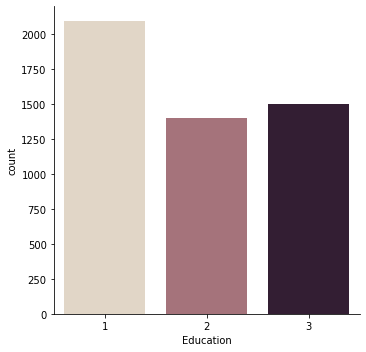

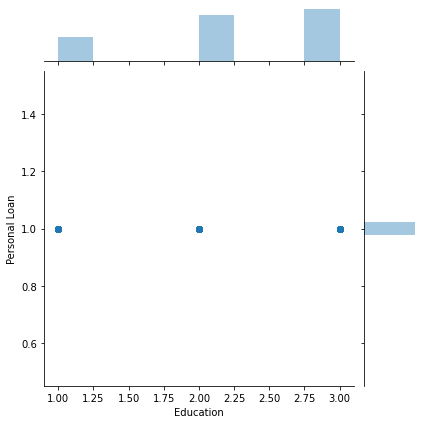

In [16]:
dataframe['Education'].value_counts()
#Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
# This should be converted to categorical variable and one hot encoded
dataframe.pivot_table(index='Personal Loan', columns='Education', aggfunc={'Education':len}, fill_value=0)
#19.3% of the total personal loans are taken by Education Level 1
#37.9% of the total personal loans are taken by Education Level 2
#42.7% of the total personal loans are taken by Education Level 3
#Eductation Levels 2 and 3 are 58% of the total number and contribute to 80% of the total personal loans taken
#so if we just targetted Eductation Levels 2 and 3 our campaign will be more successful


sns.catplot(x="Education", kind="count", palette="ch:.25", data=dataframe)
sns.jointplot(x='Education', y='Personal Loan', data=dataframe[dataframe['Personal Loan']==1])


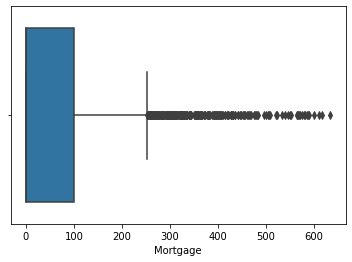

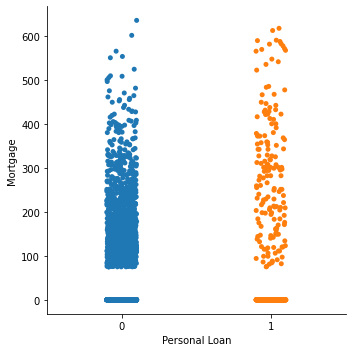

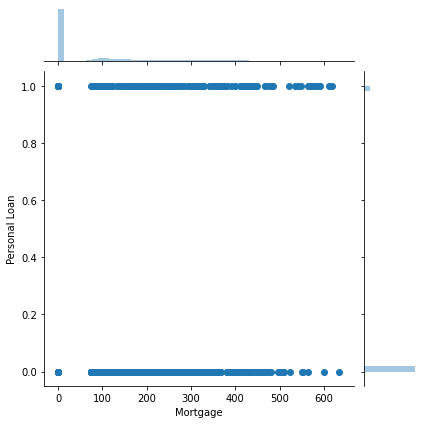

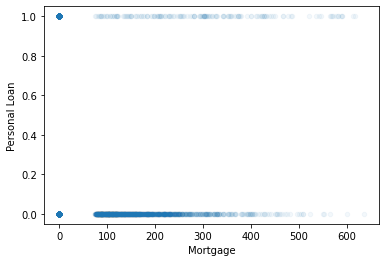

In [17]:
sns.boxplot(x=dataframe['Mortgage']) 
#Mortgage : Value of house mortgage if any. ($000)
# 75% of the people have mortgage belpw 101K
#dataframe [dataframe['Mortgage'] >250]
#299/5000 have house mortgage >250K
#dataframe[dataframe['Mortgage'] <60] - dataframe[dataframe['Mortgage']==0]

#3462/5000 69.24 % have no house mortgage

dataframe['Mortgage'].value_counts()

dataframe.loc[(dataframe['Mortgage'] != 0) & (dataframe['Personal Loan'] == 1)] # 168/1538 people =10.9% people who already have a house mortage take personal loan
dataframe.loc[(dataframe['Mortgage'] == 0) & (dataframe['Personal Loan'] == 1)] # 312/3462 people =9% people who have no house mortgage take personal loan
dataframe[dataframe['Personal Loan'] == 1]#480/5000
# From the data , it seems that people who have a house mortgage are 1.2 times more likely to take a personal loan than people who dont have any mortgage

sns.catplot(x="Personal Loan", y="Mortgage", data=dataframe)

sns.jointplot(x='Mortgage', y='Personal Loan', data=dataframe)

dataframe.plot(kind="scatter",x='Mortgage', y='Personal Loan',alpha=0.05)
# people who take personal loans spread all across different values of mortgages

Securities Account     
Securities Account                  0    1
Personal Loan                             
0                                4058  462
1                                 420   60

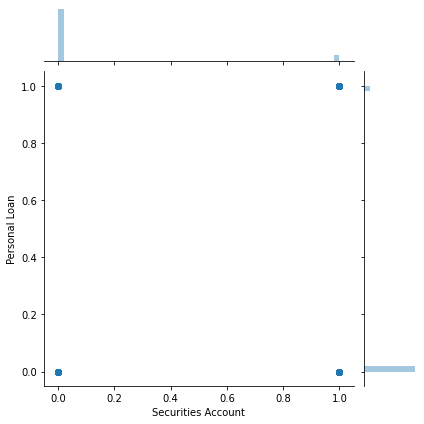

In [18]:
dataframe.pivot_table(index='Personal Loan', columns='Securities Account', aggfunc={'Securities Account':len}, fill_value=0)
# People with a Securites account are more slightly likely to take a personal loan 

sns.jointplot(x='Securities Account', y='Personal Loan', data=dataframe)
dataframe.pivot_table(index='Personal Loan', columns='Securities Account', aggfunc={'Securities Account':len}, fill_value=0)
#11.49%  of the people with securities a/c take a personal loan while 9.38% of the people without securities ac take a personal loan 
# This is not a significant difference but we can retain it






CD Account     
CD Account             0    1
Personal Loan                
0                   4358  162
1                    340  140

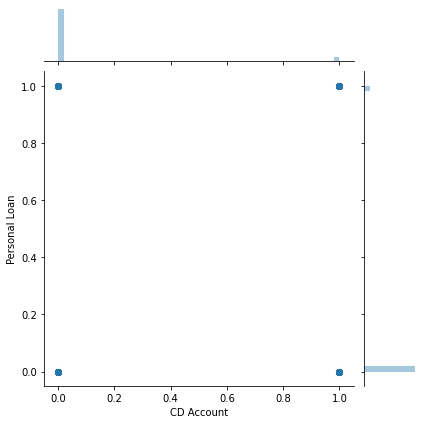

In [19]:
sns.jointplot(x='CD Account', y='Personal Loan', data=dataframe)
dataframe.pivot_table(index='Personal Loan', columns='CD Account', aggfunc={'CD Account':len}, fill_value=0)
# only 6% of the total people have CD A/c but take 30% of the Total loans .. so this is a good segment to target the campaign ,
# 140 people of the 302 people who have CD account take a personal loan ;ie 46% of people with CD a/c



Online      
Online             0     1
Personal Loan             
0               1827  2693
1                189   291

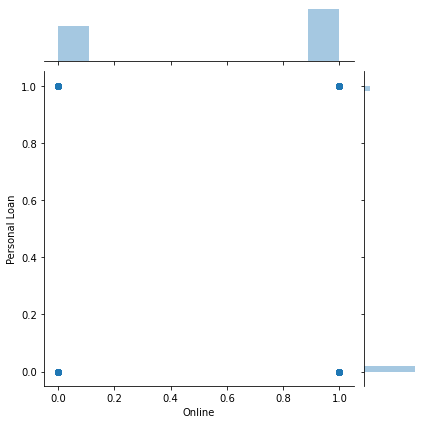

In [20]:
sns.jointplot(x='Online', y='Personal Loan', data=dataframe)
dataframe.pivot_table(index='Personal Loan', columns='Online', aggfunc={'Online':len}, fill_value=0)
#9.75%  of the people with online banking take a personal loan while 9.35% of the people without online banking take a personal loan 
# This is not a useful feature


CreditCard      
CreditCard             0     1
Personal Loan                 
0                   3193  1327
1                    337   143

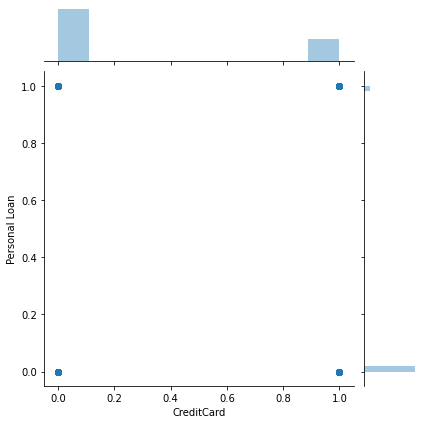

In [21]:
sns.jointplot(x='CreditCard', y='Personal Loan', data=dataframe)
dataframe.pivot_table(index='Personal Loan', columns='CreditCard', aggfunc={'CreditCard':len}, fill_value=0)
#9.73%  of the people with a Credit Card take a personal loan while 9.54% of the people without Credit Card take a personal loan 
# This is not a useful feature

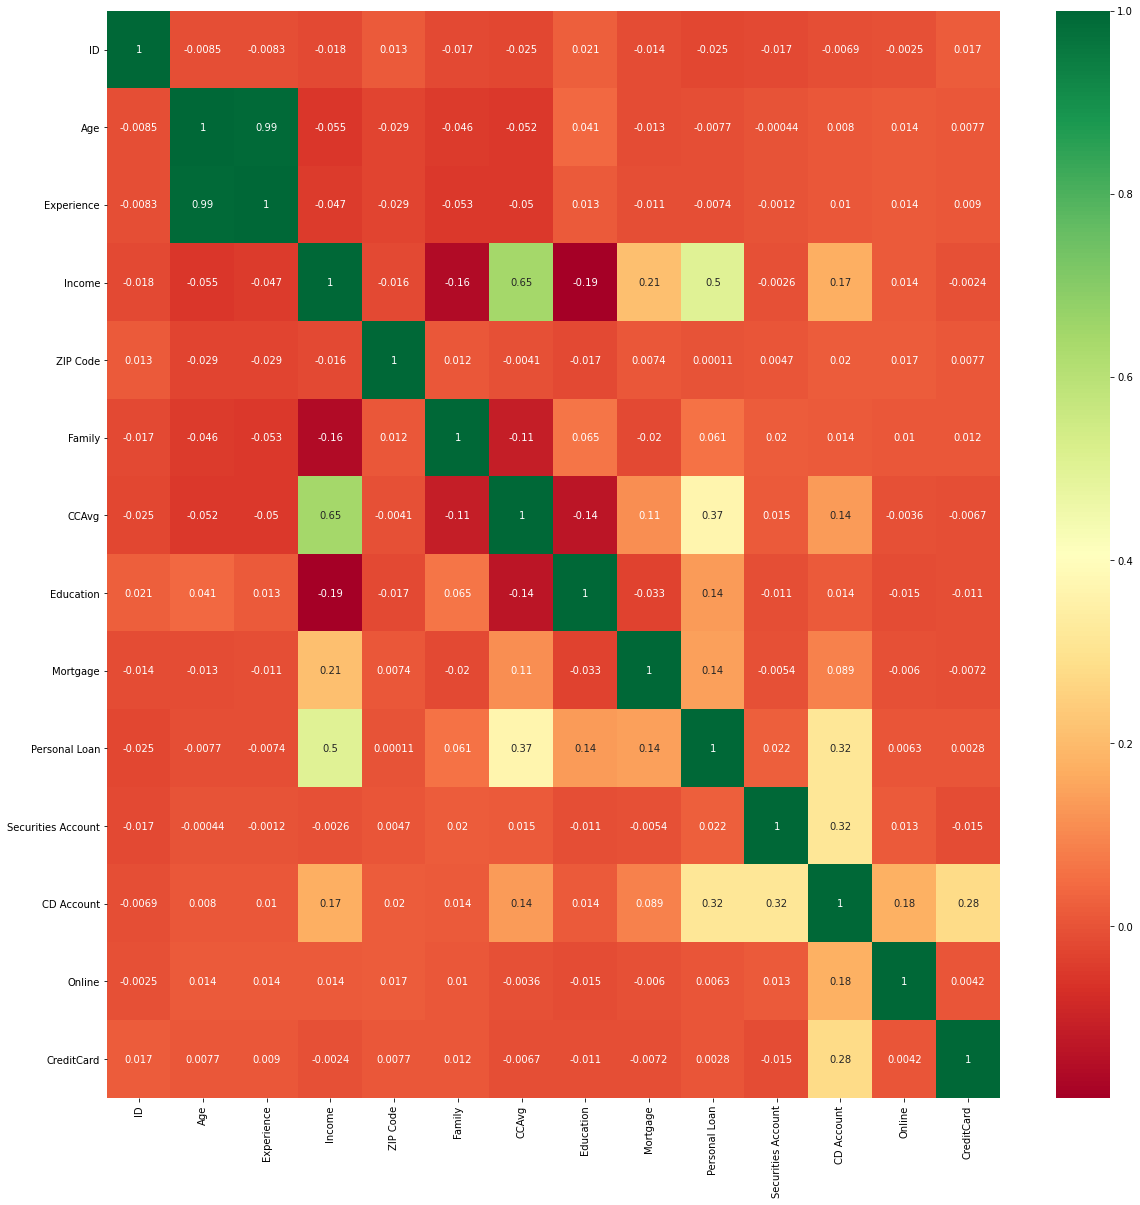

In [22]:
#get correlations of each features in dataset
import seaborn as sns

corrmat = dataframe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# ***Target Variable Distribution***

In [23]:
#Calculate baseline proportion - ratio of 0 to 1 to identify data imbalance
prop_Y = dataframe['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


**There is a very high imbalance between the two classes of data**

No handles with labels found to put in legend.


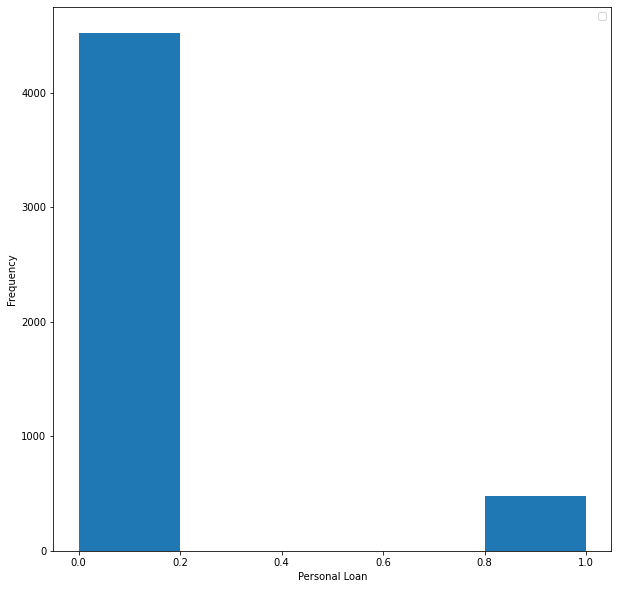

In [24]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 5 such intervals
plt.figure(figsize=(10,10)) # set the figure size
plt.hist(dataframe['Personal Loan'], bins=5) #Plot the histogram
plt.xlabel('Personal Loan')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a656bf438>,
      dtype=object)

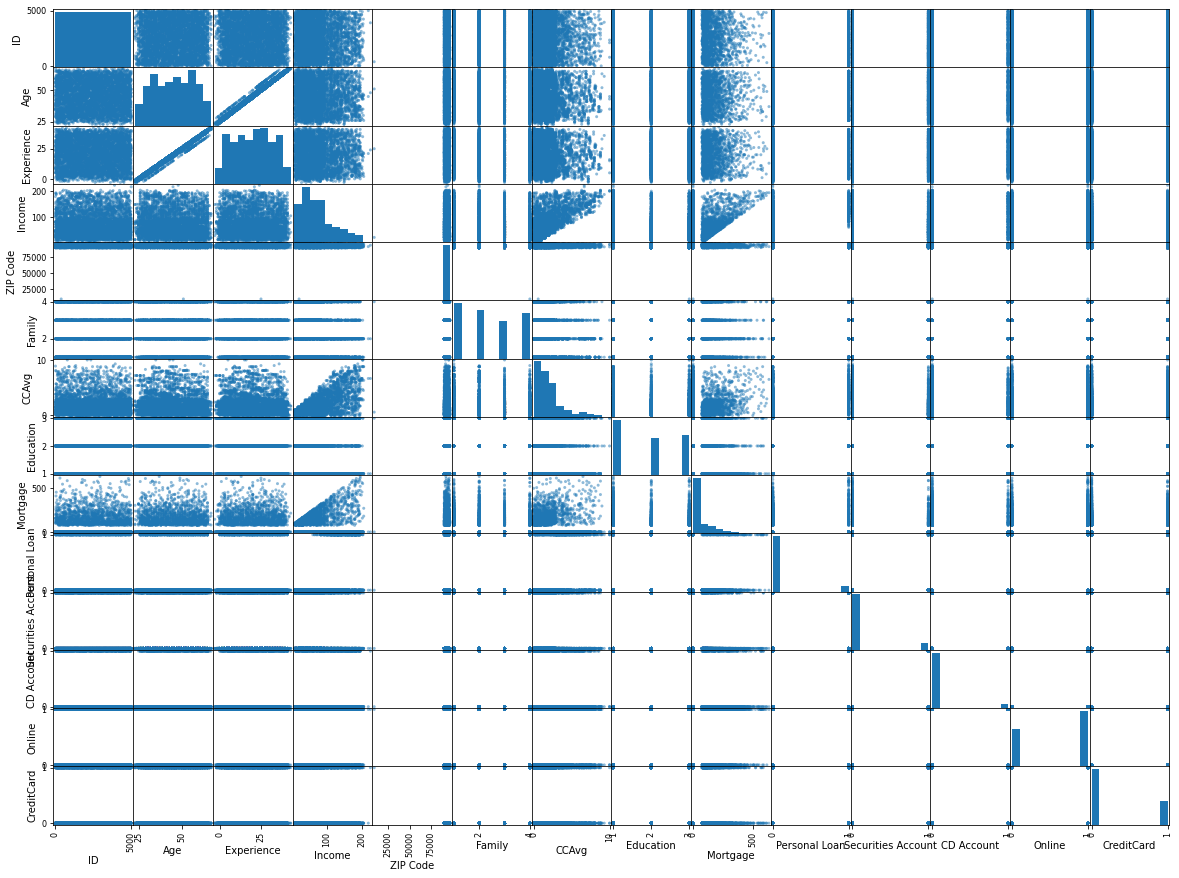

In [25]:
from pandas.plotting import scatter_matrix

attributes=list(dataframe)
scatter_matrix(dataframe[attributes],figsize=(20,15))

# ***Important Observations***

ID column should be dropped

Age is directly related to Experience ; for most of the data exp= age-20 so we will drop the age columnn , no new info is provided by Age and also affects multi collinearity. So based on this , if we look at the rows where the experience is negative value, it seems like data error so we will convert it to absolute value

Education should be converted to a categorical column and one hot encoded

Online and CreditCard are not useful features 

# ***Data Preparation***
dropping ID, online, credit card and age columns

handling Text and categorical variables

Data Cleaning - conering experience to positive values and dropping the row with 4 digits in zip code

Feature Scaling

Transformation Pipeline

In [26]:
#Convert variable to a categorical variable as relevant
dataframe.Education = dataframe.Education.astype('category')
dataframe.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [0]:
#dropping/ignoring ID,Online, Credit Card and Age columns
dataframe = dataframe.drop('ID',axis=1)
dataframe = dataframe.drop('Online',axis=1)
dataframe = dataframe.drop('CreditCard',axis=1)
dataframe = dataframe.drop('Age',axis=1)

In [28]:
dataframe.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,1,49,91107,4,1.6,1,0,0,1,0
1,19,34,90089,3,1.5,1,0,0,1,0
2,15,11,94720,1,1.0,1,0,0,0,0
3,9,100,94112,1,2.7,2,0,0,0,0
4,8,45,91330,4,1.0,2,0,0,0,0


In [29]:
#Replacing the numbers to their meanings the Education Column
dataframe['Education'] = dataframe['Education'].replace(to_replace =1,value ="Undergrad")  
dataframe['Education'] = dataframe['Education'].replace(to_replace =2,value ="Graduate")  
dataframe['Education'] = dataframe['Education'].replace(to_replace =3,value ="Advanced_Professional")  
dataframe.head()

,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,1,49,91107,4,1.6,Undergrad,0,0,1,0
1,19,34,90089,3,1.5,Undergrad,0,0,1,0
2,15,11,94720,1,1.0,Undergrad,0,0,0,0
3,9,100,94112,1,2.7,Graduate,0,0,0,0
4,8,45,91330,4,1.0,Graduate,0,0,0,0


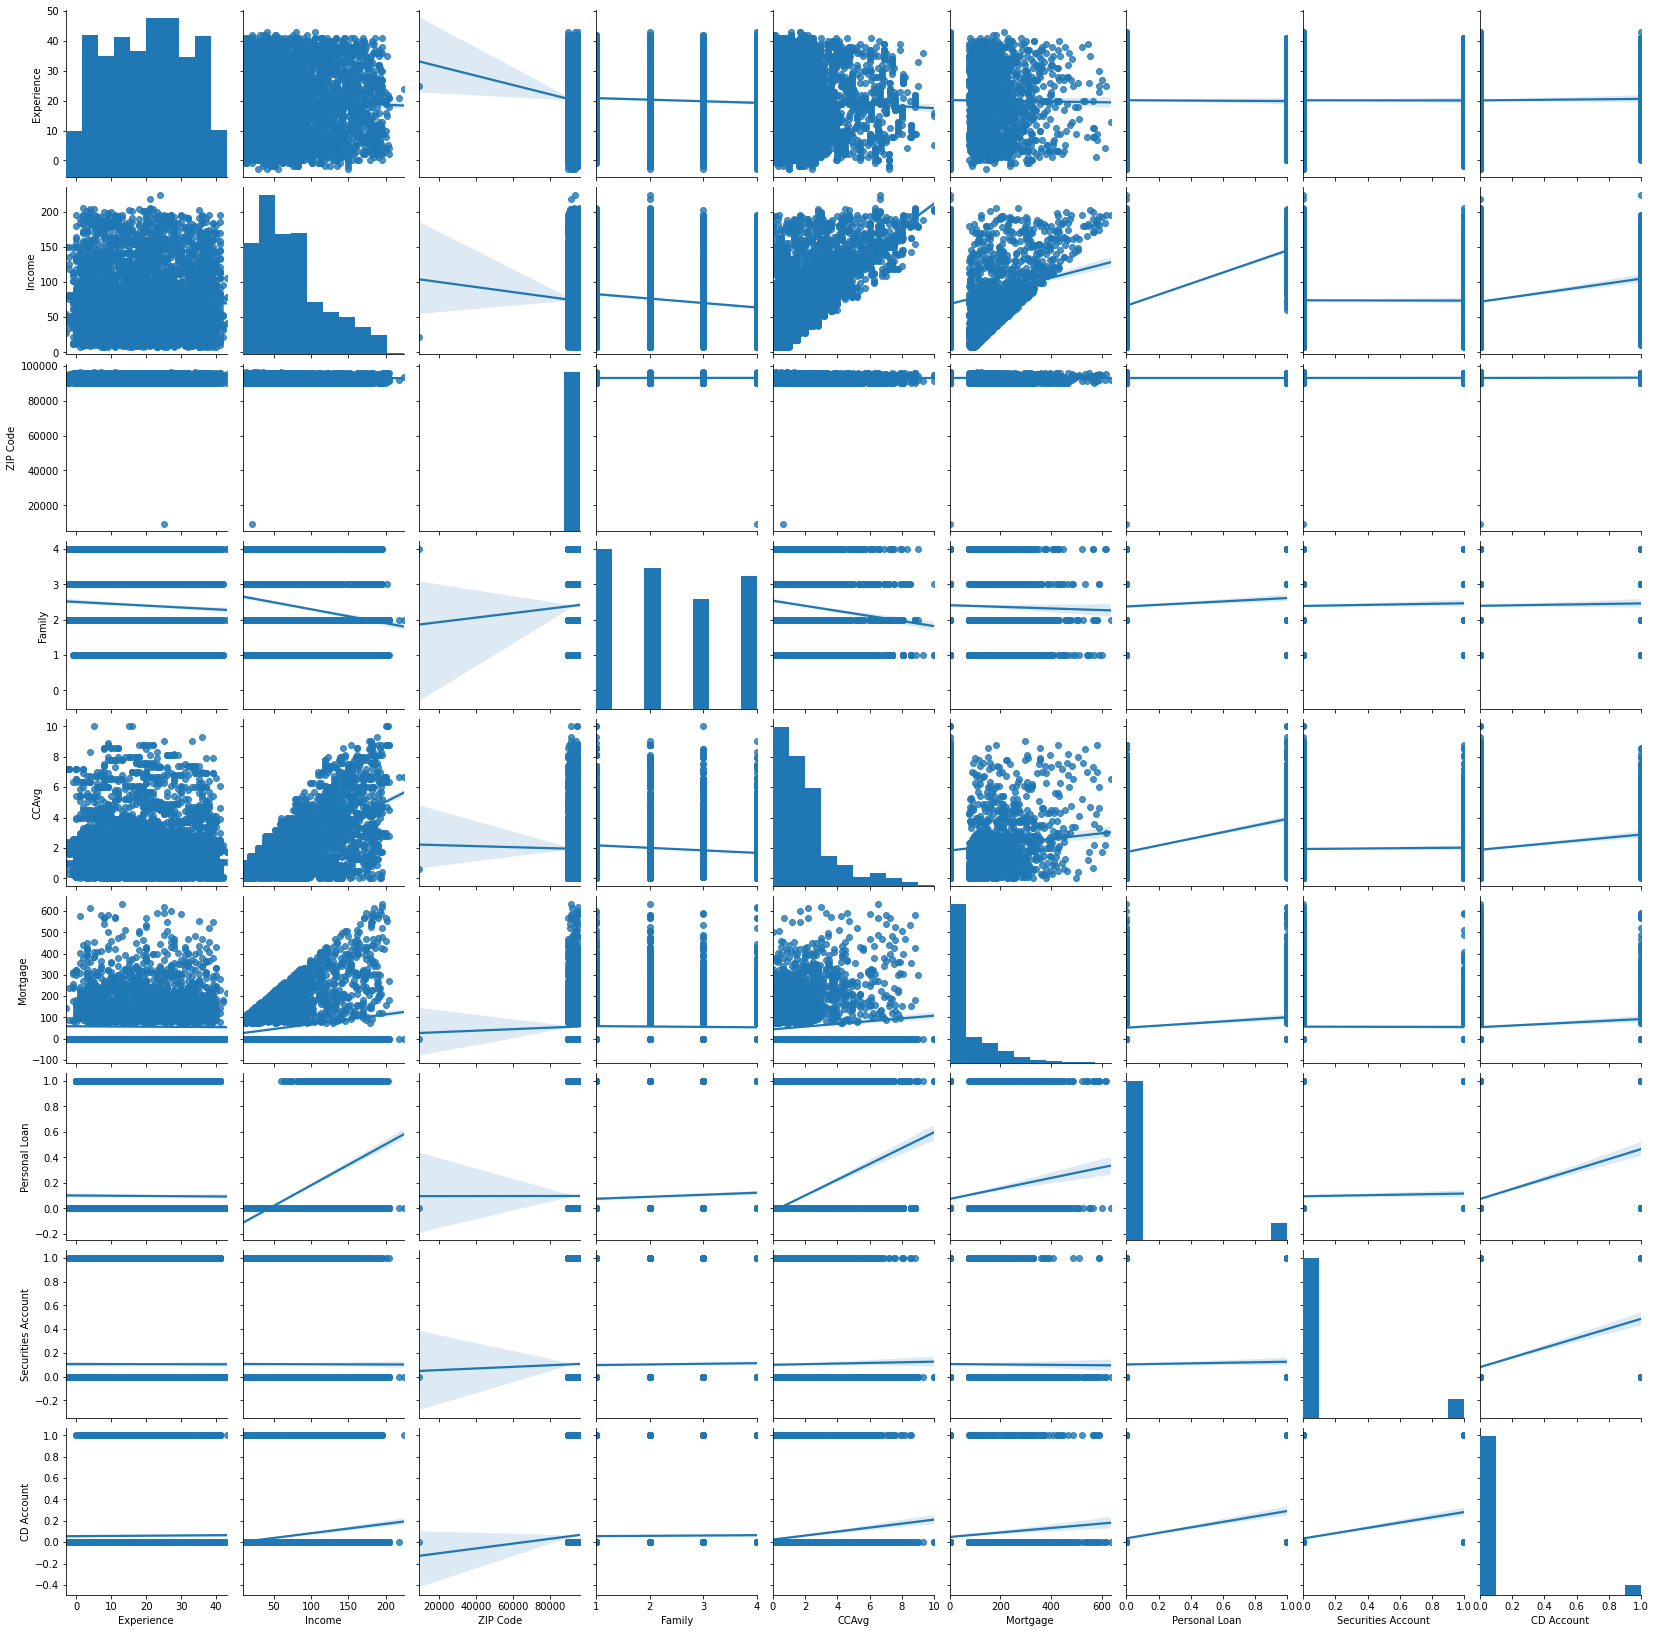

In [30]:
sns.pairplot(dataframe, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

In [31]:
#Converting the few negative numbers to positive as the corresponding Age data says that this is just a data entry issue
import numpy as np
df= dataframe['Experience'] 
print(df[df<0].value_counts())
#print(dataframe[dataframe['Experience'] <0])
ConverttoPositive = lambda x: np.absolute(x)
dataframe['Experience'] = dataframe['Experience'].apply(ConverttoPositive)
print(df[df<0].value_counts())

-1    33
-2    15
-3     4
Name: Experience, dtype: int64
Series([], Name: Experience, dtype: int64)


In [32]:
# Dropping the record with 9307 as zip code instead of 5 numbers as it is a record for which personal loan was not taken and we have lot of data in that category
dataframe[dataframe['ZIP Code']==min(dataframe['ZIP Code'])]
dataframe = dataframe.drop(dataframe[dataframe['ZIP Code']==9307].index)
dataframe[dataframe['ZIP Code']==9307]


,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account


In [33]:
dataframe.dtypes
dataframe.Education = dataframe.Education.astype('object')
dataframe.dtypes

Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
dtype: object

In [34]:
#Building the Transformation Pipeline
from sklearn.pipeline import Pipeline
from  sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
import numpy as np

dataframe_x=dataframe.drop(['Personal Loan'],axis=1)
num_attribs=["Experience","Income","ZIP Code","Family","CCAvg","Mortgage","Securities Account","CD Account"]
cat_attribs=["Education"]
dataframe_num=dataframe.loc[:,["Experience","Income","ZIP Code","Family","CCAvg","Mortgage","Securities Account","CD Account"]]
dataframe_num.head()


num_pipeline= Pipeline([
            ( 'imputer' ,SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler ())           
])

dataframe_num_tr=num_pipeline.fit_transform(dataframe_num)
dataframe_num_tr[0,1]

cat_pipeline= Pipeline([
                        ('one_hot_encoder',OneHotEncoder())
])
dataframe_cat=dataframe['Education'].values
dataframe_cat_tr=cat_pipeline.fit_transform(dataframe_cat.reshape(-1,1))
dataframe_cat_tr

full_pipeline=ColumnTransformer([
                ("num",num_pipeline,num_attribs),
                ("cat",cat_pipeline, cat_attribs)                 

])

dataframe_x_tr=full_pipeline.fit_transform(dataframe_x)
dataframe_x_tr[0,1]


-0.538475085495952

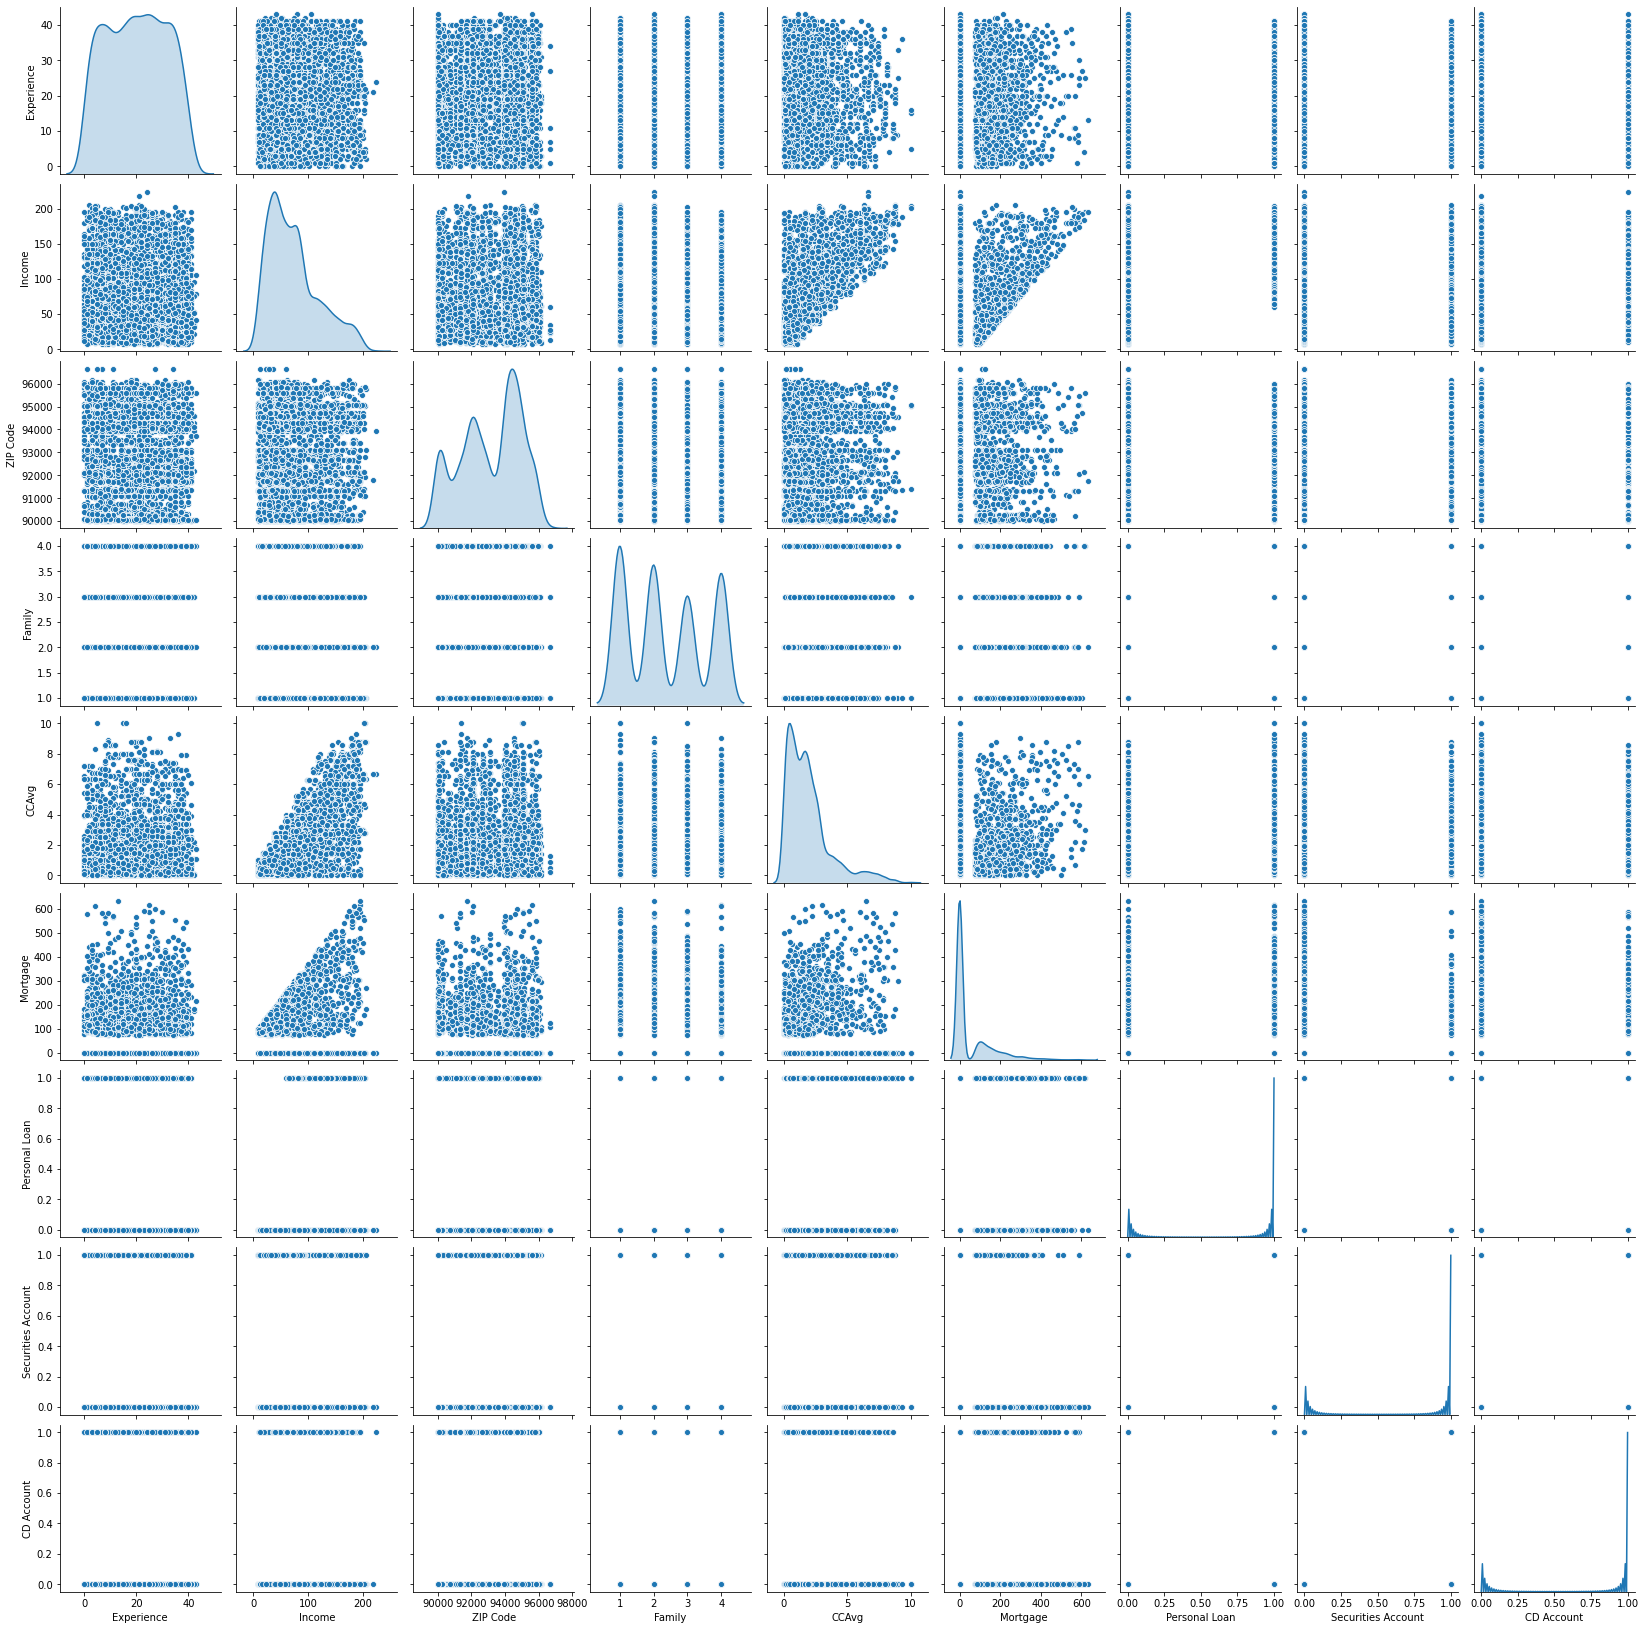

In [35]:
import seaborn as sns
df_attr = dataframe.iloc[:, 0:11]
sns.pairplot(df_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [36]:
#Correlations hae significantly improved after data preprocessing
corr_matrix=dataframe.corr()
corr_matrix["Personal Loan"].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502459
CCAvg                 0.366864
CD Account            0.316344
Mortgage              0.142065
Family                0.061471
Securities Account    0.021932
ZIP Code             -0.002977
Experience           -0.008276
Name: Personal Loan, dtype: float64

# ***Splitting the data into training and testing data set***


In [37]:
# Splitting the data into training and testing data set
seed = 7
# independant variables
x = dataframe.drop(['Personal Loan'], axis=1)
# the dependent variable
y = dataframe[['Personal Loan']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=seed)
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)
print("x_test.shape:",x_test.shape)
print("y_test.shape:",y_test.shape)
x_train.dtypes

x_train.shape: (3499, 9)
y_train.shape: (3499, 1)
x_test.shape: (1500, 9)
y_test.shape: (1500, 1)


Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Securities Account      int64
CD Account              int64
dtype: object

***Checking each model's performance using Cross validation ***

In [38]:
from sklearn.metrics import classification_report,roc_curve, auc
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(max_iter=10000)))
# evaluate each model in turn
print (1)
results = []
names = []
scoring = 'recall'
print (2)
x_train_tr=full_pipeline.fit_transform(x_train)
x_train_tr[0,1]
print (3)
for name, model in models:
	print("**********************************************************Analysis for the model :" ,name,"***********************************************************************************************************")
	kfold = StratifiedKFold(n_splits=10, random_state=seed)
	y_train_predict=  model_selection.cross_val_predict(model, x_train_tr, y_train.values.ravel(), cv=kfold)
	y_probas=model_selection.cross_val_predict(model,x_train_tr,y_train.values.ravel(),cv=kfold,method="predict_proba")
	y_scores=y_probas[:,1]
	print("=======================================Classification Report========================================")
	print(classification_report(y_train, y_train_predict, labels=[1, 0]))
	print("====================================================================================================")
	if name=='LR':
		model_name=name
		y_scores_log=y_scores
		y_train_predict_log =y_train_predict
		y_probas_log=y_probas
	elif name=='KNN':
		model_name=name
		y_scores_knn=y_scores
		y_train_predict_knn =y_train_predict
		y_probas_knn=y_probas
	elif name=='NB':
		model_name=name
		y_scores_nb=y_scores
		y_train_predict_nb =y_train_predict
		y_probas_nb=y_probas



1
2
3
**********************************************************Analysis for the model : LR ***********************************************************************************************************


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


=======================================Classification Report========================================
              precision    recall  f1-score   support

           1       0.86      0.66      0.75       332
           0       0.97      0.99      0.98      3167

    accuracy                           0.96      3499
   macro avg       0.91      0.82      0.86      3499
weighted avg       0.96      0.96      0.96      3499

**********************************************************Analysis for the model : KNN ***********************************************************************************************************


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


=======================================Classification Report========================================
              precision    recall  f1-score   support

           1       0.93      0.60      0.73       332
           0       0.96      1.00      0.98      3167

    accuracy                           0.96      3499
   macro avg       0.94      0.80      0.85      3499
weighted avg       0.96      0.96      0.95      3499

**********************************************************Analysis for the model : NB ***********************************************************************************************************
=======================================Classification Report========================================
              precision    recall  f1-score   support

           1       0.46      0.61      0.52       332
           0       0.96      0.92      0.94      3167

    accuracy                           0.89      3499
   macro avg       0.71      0.77      0.73      3499
weigh

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9577352669281483


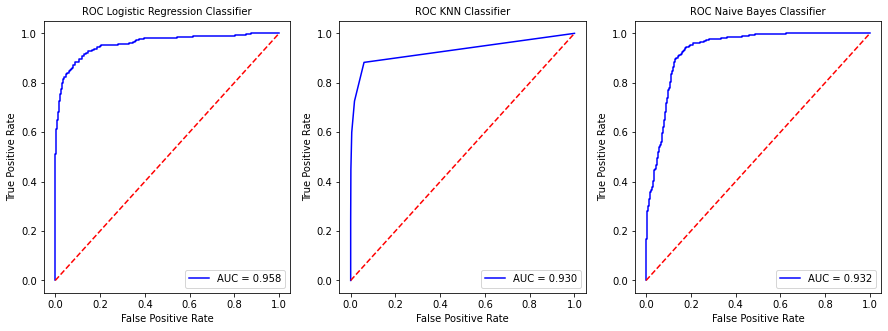

In [39]:
#setting our figures for subplots
fig, ax_arr = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
#log model 
fpr_log, tpr_log, thresholdsprc_log = roc_curve(y_train, y_scores_log)
roc_auclog = auc(fpr_log, tpr_log)
print(roc_auclog)
ax_arr[0].plot(fpr_log, tpr_log, 'b', label = 'AUC = %0.3f' % roc_auclog)
ax_arr[0].plot([0, 1], [0, 1],'r--')
ax_arr[0].set_title('ROC Logistic Regression Classifier',fontsize=10)
ax_arr[0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0].legend(loc = 'lower right', prop={'size': 10})
#KNN model
fpr_knn, tpr_knn, thresholdsprc_knn = roc_curve(y_train, y_scores_knn)
roc_aucknn = auc(fpr_knn, tpr_knn)
ax_arr[1].plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.3f' % roc_aucknn)
ax_arr[1].plot([0, 1], [0, 1],'r--')
ax_arr[1].set_title('ROC KNN Classifier',fontsize=10)
ax_arr[1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1].legend(loc = 'lower right', prop={'size': 10})
#NB model
fpr_nb, tpr_nb, thresholdsprc_nb = roc_curve(y_train, y_scores_nb)
roc_aucnb = auc(fpr_nb, tpr_nb)
ax_arr[2].plot(fpr_nb, tpr_nb, 'b', label = 'AUC = %0.3f' % roc_aucnb)
ax_arr[2].plot([0, 1], [0, 1],'r--')
ax_arr[2].set_title('ROC Naive Bayes Classifier',fontsize=10)
ax_arr[2].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[2].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[2].legend(loc = 'lower right', prop={'size': 10})     



0.9577352669281483


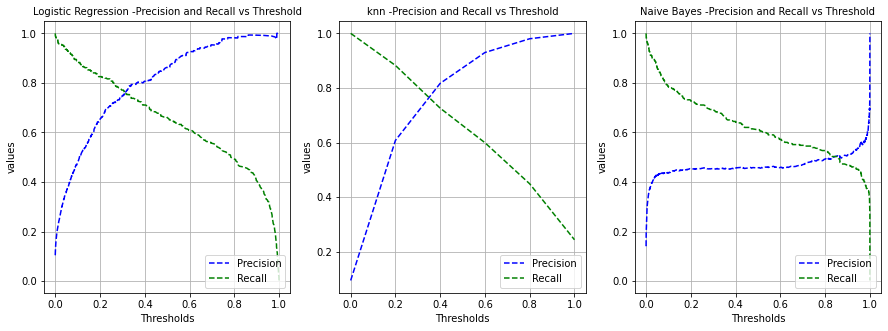

In [40]:
#setting our figures for subplots
fig, ax_arr1 = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
#log model 
#log model 
precisions_log,recalls_log,thresholds_log=precision_recall_curve(y_train,y_scores_log)
print(roc_auclog)
ax_arr1[0].plot(thresholds_log,precisions_log[:-1],"b--",label="Precision")
ax_arr1[0].plot(thresholds_log,recalls_log[:-1],"g--",label="Recall")
ax_arr1[0].set_title('Logistic Regression -Precision and Recall vs Threshold',fontsize=10)
ax_arr1[0].set_ylabel('values',fontsize=10)
ax_arr1[0].set_xlabel('Thresholds',fontsize=10)
ax_arr1[0].legend(loc = 'lower right', prop={'size': 10})
ax_arr1[0].grid(True) 
#KNN model
precisions_knn,recalls_knn,thresholds_knn=precision_recall_curve(y_train,y_scores_knn)
ax_arr1[1].plot(thresholds_knn,precisions_knn[:-1],"b--",label="Precision")
ax_arr1[1].plot(thresholds_knn,recalls_knn[:-1],"g--",label="Recall")
ax_arr1[1].set_title('knn -Precision and Recall vs Threshold',fontsize=10)
ax_arr1[1].set_ylabel('values',fontsize=10)
ax_arr1[1].set_xlabel('Thresholds',fontsize=10)
ax_arr1[1].legend(loc = 'lower right', prop={'size': 10})
ax_arr1[1].grid(True) 
#NB model
precisions_nb,recalls_nb,thresholds_nb=precision_recall_curve(y_train,y_scores_nb)
ax_arr1[2].plot(thresholds_nb,precisions_nb[:-1],"b--",label="Precision")
ax_arr1[2].plot(thresholds_nb,recalls_nb[:-1],"g--",label="Recall")
ax_arr1[2].set_title('Naive Bayes -Precision and Recall vs Threshold',fontsize=10)
ax_arr1[2].set_ylabel('values',fontsize=10)
ax_arr1[2].set_xlabel('Thresholds',fontsize=10)
ax_arr1[2].legend(loc = 'lower right', prop={'size': 10})
ax_arr1[2].grid(True)

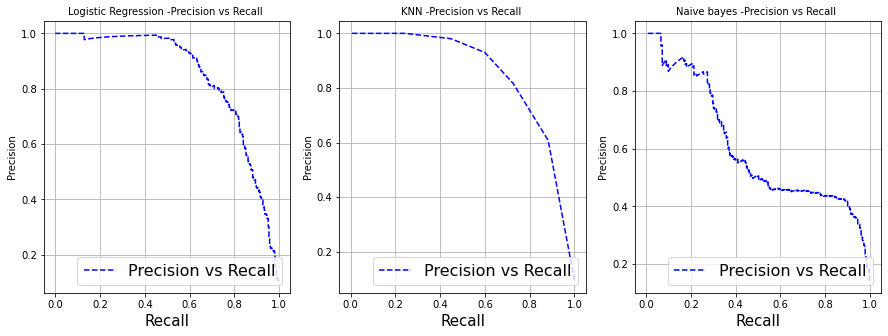

In [41]:
#setting our figures for subplots
fig, ax_arr2 = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
#log model 
precisions_log,recalls_log,thresholds_log=precision_recall_curve(y_train,y_scores_log)
ax_arr2[0].plot(recalls_log,precisions_log,"b--",label="Precision vs Recall")
ax_arr2[0].set_title('Logistic Regression -Precision vs Recall ',fontsize=10)
ax_arr2[0].set_ylabel('Precision',fontsize=10)
ax_arr2[0].set_xlabel('Recall',fontsize=15)
ax_arr2[0].legend(loc = 'lower right', prop={'size': 16})
ax_arr2[0].grid(True) 
#KNN model
precisions_knn,recalls_knn,thresholds_knn=precision_recall_curve(y_train,y_scores_knn)
ax_arr2[1].plot(recalls_knn,precisions_knn,"b--",label="Precision vs Recall")
ax_arr2[1].set_title('KNN -Precision vs Recall ',fontsize=10)
ax_arr2[1].set_ylabel('Precision',fontsize=10)
ax_arr2[1].set_xlabel('Recall',fontsize=15)
ax_arr2[1].legend(loc = 'lower right', prop={'size': 16})
ax_arr2[1].grid(True)
#NB model
precisions_nb,recalls_nb,thresholds_nb=precision_recall_curve(y_train,y_scores_nb)
ax_arr2[2].plot(recalls_nb,precisions_nb,"b--",label="Precision vs Recall")
ax_arr2[2].set_title('Naive bayes -Precision vs Recall ',fontsize=10)
ax_arr2[2].set_ylabel('Precision',fontsize=10)
ax_arr2[2].set_xlabel('Recall',fontsize=15)
ax_arr2[2].legend(loc = 'lower right', prop={'size': 16})
ax_arr2[2].grid(True)   

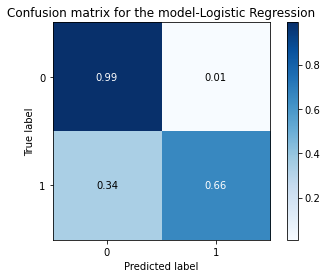

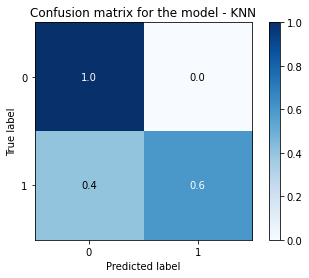

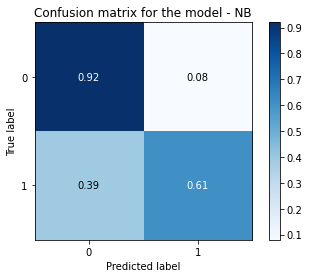

In [42]:
#plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_train, y_train_predict_log, normalize=True,title='Confusion matrix for the model-Logistic Regression' )
skplt.metrics.plot_confusion_matrix(y_train, y_train_predict_knn, normalize=True,title='Confusion matrix for the model - KNN' )
skplt.metrics.plot_confusion_matrix(y_train, y_train_predict_nb, normalize=True,title='Confusion matrix for the model - NB' )



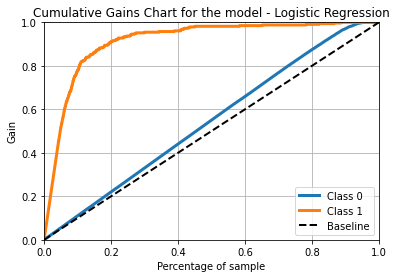

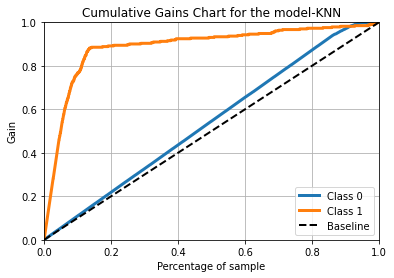

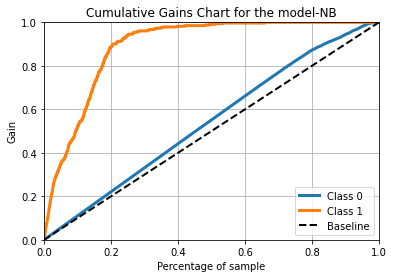

In [43]:
#Plot the gains chart
skplt.metrics.plot_cumulative_gain(y_train, y_probas_log,title='Cumulative Gains Chart for the model - Logistic Regression')
skplt.metrics.plot_cumulative_gain(y_train, y_probas_knn,title='Cumulative Gains Chart for the model-KNN')
skplt.metrics.plot_cumulative_gain(y_train, y_probas_nb,title='Cumulative Gains Chart for the model-NB')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


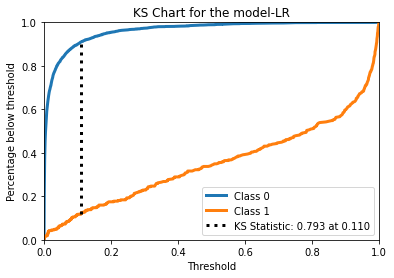

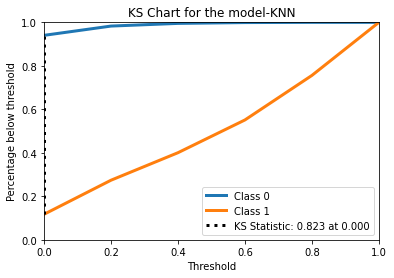

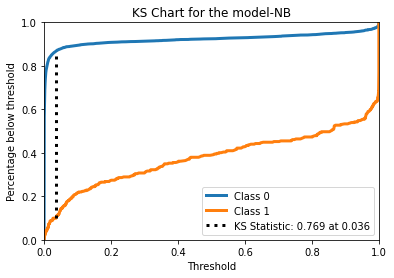

In [44]:
#Plot the KS statistic
skplt.metrics.plot_ks_statistic(y_train, y_probas_log,title='KS Chart for the model-LR')
skplt.metrics.plot_ks_statistic(y_train, y_probas_knn,title='KS Chart for the model-KNN')
skplt.metrics.plot_ks_statistic(y_train, y_probas_nb,title='KS Chart for the model-NB')

**Performing Grid Search for the short listed models - Logistic Regression**

In [45]:
#Grid Search for NB and LR

#Logistic Regression
# Logistic regression does not really have any critical hyperparameters to tune.
#Sometimes, you can see useful differences in performance or convergence with different solvers (solver).
#solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
#Regularization (penalty) can sometimes be helpful.
#penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’] Note: not all solvers support all regularization terms.
#The C parameter controls the penality strength, which can also be effective.
#C in [100, 10, 1.0, 0.1, 0.01]
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression(max_iter=100000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
x_train_tr=full_pipeline.fit_transform(x_train)
x_train_tr[0,1]
grid_result = grid_search.fit(x_train_tr, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
best_logreg_model=grid_result.best_estimator_
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
  

Best: 0.960406 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.957425 (0.022538) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.957425 (0.022538) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.957419 (0.022536) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.957438 (0.022534) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.957435 (0.022538) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.957435 (0.022530) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblin

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
#K-Nearest Neighbors (KNN)
#The most important hyperparameter for KNN is the number of neighbors (n_neighbors).
#Test values between at least 1 and 21, perhaps just the odd numbers.
#n_neighbors in [1 to 21]
#It may also be interesting to test different distance metrics (metric) for choosing the composition of the neighborhood.
#metric in [‘euclidean’, ‘manhattan’, ‘minkowski’]
#For a fuller list see:
#sklearn.neighbors.DistanceMetric API
#It may also be interesting to test the contribution of members of the neighborhood via different weightings (weights).
#weights in [‘uniform’, ‘distance’]
# example of grid searching key hyperparametres for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
x_train_tr=full_pipeline.fit_transform(x_train)
x_train_tr[0,1]
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x_train_tr, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.968157 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
0.831632 (0.047131) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.831632 (0.047131) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.902665 (0.032753) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.903722 (0.032854) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.923598 (0.031004) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.925712 (0.030974) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.933558 (0.032386) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.936148 (0.032095) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.941980 (0.027019) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.944518 (0.026634) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.945657

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


**Performing Grid Search for the short listed models - Naive Bayes Classifier**

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.preprocessing import PowerTransformer

# define models and parameters
model = GaussianNB()
print(np.logspace(0,-9, num=10))
var_smoothing = [1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08, 1.e-09]#np.logspace(0,-9, num=100)
# define grid search
grid =dict( )
grid = dict(var_smoothing=var_smoothing)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
x_train_tr=full_pipeline.fit_transform(x_train)
x_train_tr[0,1]
grid_result = grid_search.fit(x_train_tr, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
best_nb_model=grid_result.best_estimator_
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))



[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09]
Best: 0.932924 using {'var_smoothing': 1e-06}
0.927486 (0.013014) with: {'var_smoothing': 1.0}
0.930211 (0.013133) with: {'var_smoothing': 0.1}
0.932515 (0.013291) with: {'var_smoothing': 0.01}
0.932877 (0.013360) with: {'var_smoothing': 0.001}
0.932905 (0.013346) with: {'var_smoothing': 0.0001}
0.932918 (0.013347) with: {'var_smoothing': 1e-05}
0.932924 (0.013345) with: {'var_smoothing': 1e-06}
0.932924 (0.013345) with: {'var_smoothing': 1e-07}
0.932924 (0.013345) with: {'var_smoothing': 1e-08}
0.932924 (0.013345) with: {'var_smoothing': 1e-09}


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ***Logistic Regression has been identified as the best model based on the GridSearch results based on ROC_AUC, Recall, Cumulative gains and the KS Statistics. Hence proceeding with logistic Regression as the final model and fitting it.***

Grid Search results based on ROC_AUC scoring:

Logistic Regression:0.960406

KNN:0.968157

NB: 0.932924

Recall :

Logistic Regression:0.66

KNN:0.61

NB: 0.6

In [47]:
#Fitting the Test Data
final_model=best_logreg_model
x_test_tr=full_pipeline.fit_transform(x_test)
x_test_tr[0,1]

final_predictions=final_model.predict_proba(x_test_tr)

y_pred_prob=final_predictions[:,1]#Probability for class 1
y_pred_prob

array([0.00630357, 0.00242732, 0.00663668, ..., 0.03361272, 0.00205047,
       0.0002872 ])

In [0]:
# predict probability of taking loan if the predicted probability is greater than 0.3
# We are using the threshold of 0.3 based on what we learnt from the
#Precision, Recall vs Threshold plot , the cumulative Gains and the KS statistic
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]


In [49]:
y_pred_class

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, final_predictions[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
#AUC is useful as a single number summary of classifier performance.
#If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
#AUC is useful even when there is high class imbalance (unlike classification accuracy).

Area under the ROC curve : 0.958285


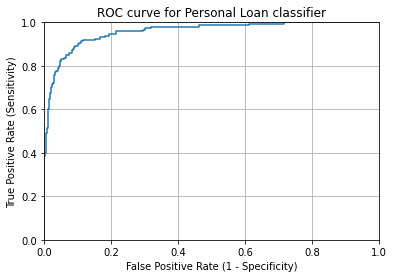

In [51]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Personal Loan classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [52]:
	print("=======================================Classification Report========================================")
	print(classification_report(y_test, y_pred_class, labels=[1, 0]))
	print("====================================================================================================")

=======================================Classification Report========================================
              precision    recall  f1-score   support

           1       0.74      0.74      0.74       148
           0       0.97      0.97      0.97      1352

    accuracy                           0.95      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.95      0.95      0.95      1500



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


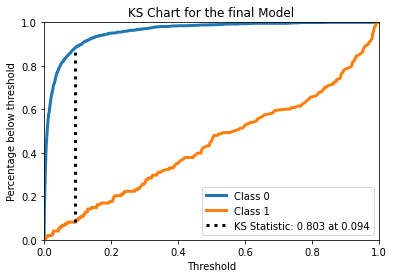

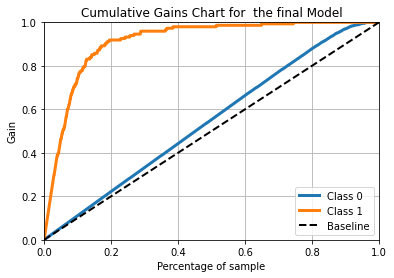

In [55]:
#Plot the KS chart and Cumulative gains chart for the test data
import scikitplot as skplt
skplt.metrics.plot_ks_statistic(y_test, final_predictions,title='KS Chart for the final Model')
skplt.metrics.plot_cumulative_gain(y_test, final_predictions,title='Cumulative Gains Chart for  the final Model')

In [0]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    

In [53]:
evaluate_threshold(0.3)

Sensitivity: 0.7432432432432432
Specificity: 0.9711538461538461


# Regularization used
Since there is a Class Imbalance, we are using the weighted average of the Precision and Recall as the performance measure

Due to the same reason we are using the ROC AUC metric to check for the best model

We have also checked for Ridge, lasso, elasticnet etc in the GridSearch for Logistic Regression. Our best model has the following params:Best: 0.960406 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
and used l2 Ridge penalty

# ***Range estimate at 95% confidence for the model performance in production***

0.7132038195587751
0.7099033011003668
0.7012056044314109
0.7022825008269931
0.7020085610800132
0.7069248441089596
0.7110166721150702
0.7048472775564409
0.7040549378678875
0.7138125207022192
0.7127834373973053
0.7111770524233432
0.7126816380449141
0.7112054884024829
0.7139565503620803
0.7125906394199077
0.701290109163083
0.7032601463739189
0.6982674076495586
0.7069874752801583
0.7131093544137023
0.7099967007588255
0.704896483733158
0.7045980813761165
0.706845725515886
0.7010512483574245
0.7197473404255319
0.7097304404996713
0.7153236459709379
0.710387902695595
0.7051871306631649
0.7083743842364532
0.69804441498177
0.7103357472021067
0.7021760311789542
0.7022674991784423
0.6927117531188444
0.699967029343884
0.7076158940397351
0.6979269496544916
0.7058432934926959
0.7014280969777482
0.7055518836748182
0.7016317016317016
0.7009132420091324
0.7011265738899933
0.7089824328803447
0.7068166776968895
0.7127764938923737
0.701859229747676
0.7049180327868853
0.7083743842364532
0.7023731048121292
0

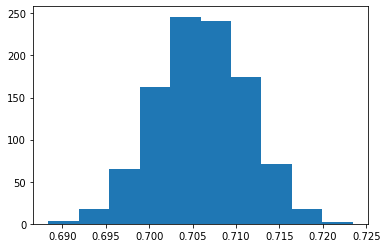

95.0 confidence interval 69.6% and 71.6%


In [63]:
#Range estimate at 95% confidence for the model performance in production.
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
values = dataframe_orig.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(dataframe_orig) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = best_logreg_model
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)
	print(score)
	stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# ***Insights***

This predictive model on Personal Loan acceptance will help Thera Bank **target the right set of customers** and **improve the success ratio with minimal budget. ** 

**The performance measures chosen for this analysis are Recall, ROC_AUC ,Cumulative Gains Chart and the KS statistic.** 

**Recall/Sensitivity :**
The reason for considering the Recall/Sensitivity as the measure of performance of the model is because we want to increase the ratio of the number of people actually took the loan(True Positives) to the summation of the number of people who actually took the loan(True Positives) and number that we predicted will not take the loan but took the loan(False Negatives). 
One may argue that it is important to reduce the number of false positives and look for a model that will have a better precision but since this model is going to be used in the future for targeted marketing campaigns with increased success ratio with minimal budget, it is important that we make sure that the number of false negatives is minimized so we are targeting all the customers who will accept the loan.
As the False Negatives and False Positives are inversely proportional, the focus needs to be on reducing the false negatives so that Thera Bank can target only the customers pedicted by this model and maximize their success ratio.

The model created performed well on the test data with a Recall of 0.74 and a weighted average Recall of 0.96.

This means that if they targeted only customers predicted by the model they would find a personal loan taker 74%(based on the test data,may vary depending on the production data) of the times which is a significant jump from the 9.6% success ratio they had previously. Minimizing the number of customers to be targeted will also bring down their marketing campaign costs.


**ROC_AUC:**
Area under ROC curve is often used as a measure of quality of the classification models. A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1.The closer the value to 1 the better the classifier.

The dataset that we used for the Personal Loan predictions was very skewed and had only 480 personal loan takers as compared to the 5000 customers customers that Thera Bank reached out to.
Due to the imbalance in the data , the ROC_AUC has been chosen as one of the performance measures for this model.

The model performed well on the test data with a ROC_AUC score of 0.958285 showing that the model is robust.
The area under the ROC curve of 0.958285 means that a randomly selected case from the group with the target equals 1 has a score larger than that for a randomly chosen case from the group with the target equals 0 in 95.8% of the time

**KS Statistic:**
KS statistic is a measure of the degree of separation between the positive and negative distributions. The K-S is 100 if the scores partition the population into two separate groups in which one group contains all the positives and the other all the negatives. On the other hand, If the model cannot differentiate between positives and negatives, then it is as if the model selects cases randomly from the population. The K-S would be 0. In most classification models the K-S will fall between 0 and 100, and that the higher the value the better the model is at separating the positive from negative cases.

As indicated by the KS Chart , the classes are very well separated and at 0.803 at 0.094 

**Cumlative gains:**
Gain charts are visual aids for evaluating performance of classification models. However, in contrast to the confusion matrix that evaluates models on the whole population gain or lift chart evaluates model performance in a portion of the population. Here our Cumulative gains Chart indicates that by targeting the first 30% of the population, we will be able to cover about 90% of the people who would take loans. This helps us with the targeting the right customers and invest in campaigning only to this30% and leave out the rest 70% who contribute to only 10% of the additional loans taken.

